In [1]:
### set environment
import numpy as np
import pandas as pd
import argparse
import os

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Dimension reduction and clustering libraries
import umap
import phenograph

import matplotlib.pyplot as plt

In [2]:
txt_fdiry = "/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary2"
txt_fname = "matrix.annotation.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

mat = pd.read_csv(txt_fpath, sep="\t")
vec = mat.Region
mat = mat.set_index('Region')

mat_region_annot_fcc = mat
print(mat.shape)
mat.head()

(87610, 536)


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,...,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
Region,,,,,,,,,,,,,,,,,,,,,
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
chr1:184091-184563,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:186343-187136,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
txt_fdiry = "/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary2"
txt_fname = "result.summary.fcc_peak_call.assayvote.gcfilter.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dat = pd.read_csv(txt_fpath, sep="\t")

dat_region_fcc_vote = dat
print(dat.shape)
dat.head()

(175421, 3)


,Region,Num_Assay,Type
0,chr1:115429-115969,1,Enhancer
1,chr1:184091-184563,1,Enhancer
2,chr1:605104-605675,1,Enhancer
3,chr1:778233-779389,3,Enhancer
4,chr1:818708-819335,1,Enhancer


In [18]:
dat = dat_region_fcc_vote
idx = (dat.Type == "Enhancer")
dat = dat.loc[idx,:]
dat

,Region,Num_Assay,Type
0,chr1:115429-115969,1,Enhancer
1,chr1:184091-184563,1,Enhancer
2,chr1:605104-605675,1,Enhancer
3,chr1:778233-779389,3,Enhancer
4,chr1:818708-819335,1,Enhancer
...,...,...,...
47681,chrX:155745699-155746091,2,Enhancer
47682,chrX:155767150-155768005,1,Enhancer
47683,chrX:155880782-155881899,3,Enhancer
47684,chrX:155997331-155998028,1,Enhancer


In [3]:
X = mat_region_annot_fcc.to_numpy()
X.shape

(87610, 536)

In [8]:
y1 = mat_region_annot_fcc.loc[:,"CTCF"].to_numpy().astype(int)
y2 = mat_region_annot_fcc.loc[:,"SMC3"].to_numpy().astype(int)
y3 = mat_region_annot_fcc.loc[:,"RAD21"].to_numpy().astype(int)
y  = y1 * y2
i  = y == 1

CPU times: user 27 ms, sys: 186 µs, total: 27.2 ms
Wall time: 24.9 ms


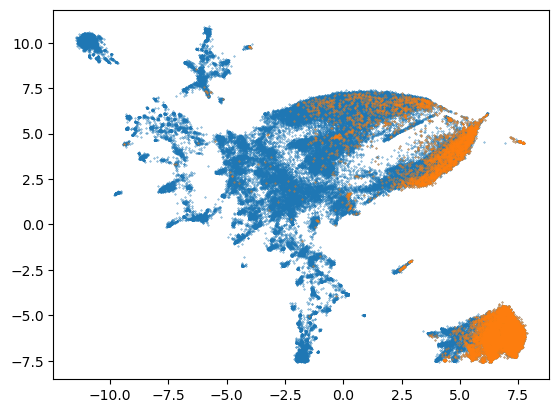

In [9]:
%%time
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)
plt.scatter(X_ump[i, 0], X_ump[i, 1], s=0.1)

CPU times: user 8min 9s, sys: 41.3 s, total: 8min 50s
Wall time: 58.8 s


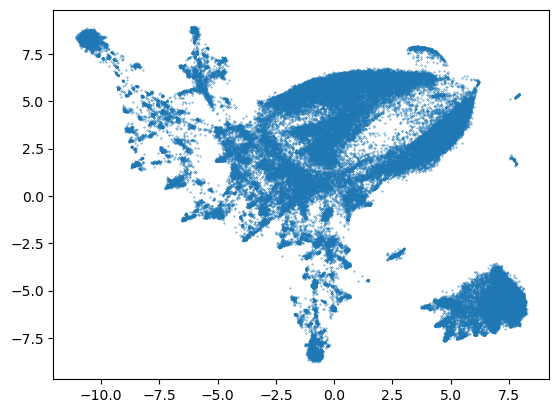

In [19]:
%%time
X_ump_man = umap.UMAP(metric = "manhattan", min_dist = 0.15).fit_transform(X)
plt.scatter(X_ump_man[:, 0], X_ump_man[:, 1], s=0.1)

CPU times: user 8min 36s, sys: 47.2 s, total: 9min 23s
Wall time: 1min 5s


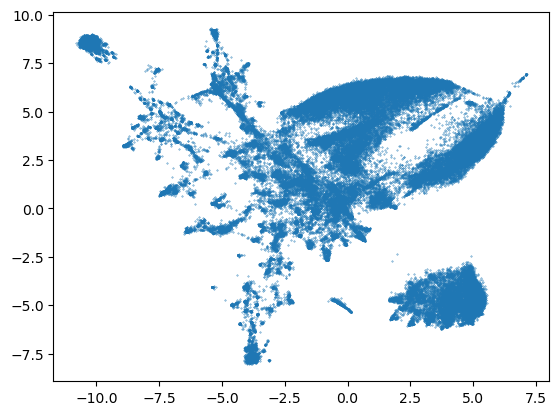

In [11]:
%%time
X_ump_euc = umap.UMAP(metric = "euclidean").fit_transform(X)
plt.scatter(X_ump_euc[:, 0], X_ump_euc[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 32.6 s, sys: 3.19 s, total: 35.8 s
Wall time: 30.5 s


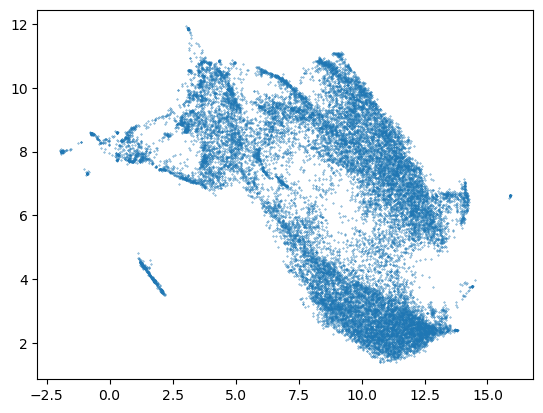

In [5]:
%%time
X_ump = umap.UMAP(metric = "jaccard", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(
/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 34.3 s, sys: 3.29 s, total: 37.6 s
Wall time: 32.3 s


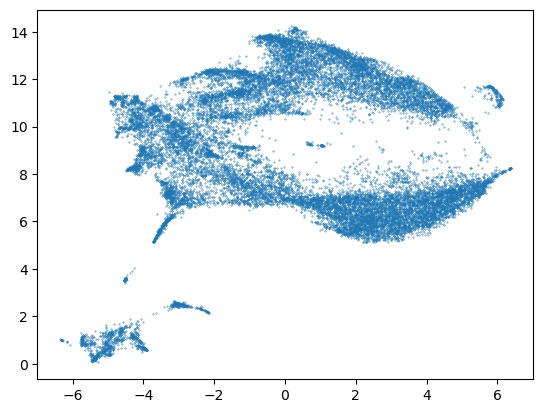

In [6]:
%%time
X_ump = umap.UMAP(metric = "hamming", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 31 s, sys: 3.12 s, total: 34.2 s
Wall time: 29 s


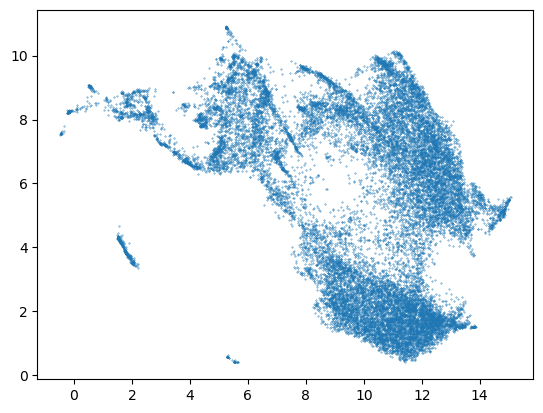

In [7]:
%%time
X_ump = umap.UMAP(metric = "cosine", random_state=123).fit_transform(X)
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)